In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential

In [2]:
cifar10 = datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

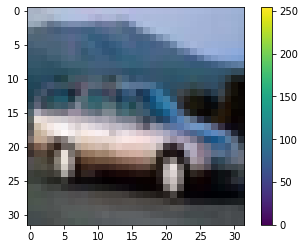

In [5]:
plt.figure()##데이터 그려보기
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images /255.0##신경망 모델에 넣기전에 픽셀 값 범위를
test_images = test_images / 255.0##0~1사이로 조정해야됌

In [7]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [8]:
model = Sequential()

In [9]:
model.add(keras.layers.Conv2D(32,kernel_size=(5,5),strides=(1,1),padding="same",activation="relu",input_shape=(32,32,3)))

In [10]:
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2,)))

In [11]:
model.add(keras.layers.Conv2D(64,kernel_size=(2,2),strides=(1,1),padding="same",activation="relu"))

In [12]:
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              4

In [14]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [40]:
hist = model.fit(train_images,train_labels,batch_size=128,epochs=12,verbose=1,validation_data=(test_images,test_labels))

Epoch 1/12
391/391 [==============================] - 113s 289ms/step - loss: 1.5175 - accuracy: 0.4513 - val_loss: 1.2111 - val_accuracy: 0.5753
Epoch 2/12
391/391 [==============================] - 114s 291ms/step - loss: 1.1856 - accuracy: 0.5796 - val_loss: 1.0728 - val_accuracy: 0.6296
Epoch 3/12
391/391 [==============================] - 113s 288ms/step - loss: 1.0421 - accuracy: 0.6317 - val_loss: 1.0051 - val_accuracy: 0.6485
Epoch 4/12
391/391 [==============================] - 112s 287ms/step - loss: 0.9415 - accuracy: 0.6691 - val_loss: 0.9067 - val_accuracy: 0.6850
Epoch 5/12
391/391 [==============================] - 112s 287ms/step - loss: 0.8640 - accuracy: 0.6964 - val_loss: 0.8546 - val_accuracy: 0.7067
Epoch 6/12
391/391 [==============================] - 113s 288ms/step - loss: 0.7860 - accuracy: 0.7253 - val_loss: 0.8097 - val_accuracy: 0.7199
Epoch 7/12
391/391 [==============================] - 113s 288ms/step - loss: 0.7259 - accuracy: 0.7443 - val_loss: 0.8160 -

In [15]:
agu=[]
for i in train_images:
  image=np.flip(i)
  agu.append(image)

In [16]:
a=np.array(agu)

In [17]:
a.shape

(50000, 32, 32, 3)

In [18]:
train_agu = np.concatenate([a, train_images], axis=0)

In [19]:
train_labels_agu = np.concatenate([train_labels, train_labels], axis=0)

In [20]:
hist = model.fit(train_agu,train_labels_agu,batch_size=128,epochs=12,verbose=1,validation_data=(test_images,test_labels))

Epoch 1/12
782/782 [==============================] - 226s 287ms/step - loss: 1.6395 - accuracy: 0.4099 - val_loss: 1.3496 - val_accuracy: 0.5223
Epoch 2/12
782/782 [==============================] - 224s 286ms/step - loss: 1.2901 - accuracy: 0.5436 - val_loss: 1.1478 - val_accuracy: 0.5934
Epoch 3/12
782/782 [==============================] - 228s 292ms/step - loss: 1.1392 - accuracy: 0.5981 - val_loss: 1.0653 - val_accuracy: 0.6191
Epoch 4/12
782/782 [==============================] - 225s 288ms/step - loss: 1.0407 - accuracy: 0.6324 - val_loss: 0.9701 - val_accuracy: 0.6574
Epoch 5/12
782/782 [==============================] - 227s 290ms/step - loss: 0.9607 - accuracy: 0.6622 - val_loss: 0.9487 - val_accuracy: 0.6645
Epoch 6/12
782/782 [==============================] - 223s 286ms/step - loss: 0.8953 - accuracy: 0.6861 - val_loss: 0.9385 - val_accuracy: 0.6700
Epoch 7/12
782/782 [==============================] - 224s 286ms/step - loss: 0.8380 - accuracy: 0.7063 - val_loss: 0.8747 -